# Sales Performance & Decision Making Using Statistics

**PART 1: Descriptive Statistics (Chapter 2)**
**Task 1.1 – Central Tendency**
For monthly revenue:

Calculate:
- Mean
- Median
- Mode

Explain which measure best represents revenue and why (consider outliers).

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime

In [21]:
df = pd.read_csv('statistics_sales_project_data.csv')
df

,date,store_type,region,marketing_campaign,units_sold,revenue
0,2023-01-01,Online,Western,Yes,6,11876.03
1,2023-01-02,Physical,Rift Valley,Yes,8,14333.00
2,2023-01-03,Physical,Western,No,4,8101.97
3,2023-01-04,Physical,Coast,No,8,10928.92
4,2023-01-05,Online,Nairobi,No,9,18166.40
...,...,...,...,...,...,...
1195,2026-04-10,Physical,Coast,No,9,19206.49
1196,2026-04-11,Physical,Rift Valley,Yes,2,4469.23
1197,2026-04-12,Physical,Rift Valley,No,5,8560.56
1198,2026-04-13,Physical,Central,No,6,8324.26


In [23]:
df.describe()

,units_sold,revenue
count,1200.000000,1200.000000
mean,4.976667,8271.974000
std,2.271289,4279.961469
min,0.000000,0.000000
25%,3.000000,5177.527500
50%,5.000000,7723.325000
75%,6.000000,10739.320000
max,15.000000,26885.870000


In [24]:
df.dtypes

date                   object
store_type             object
region                 object
marketing_campaign     object
units_sold              int64
revenue               float64
dtype: object

In [25]:
# converting 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'])

In [26]:
df.dtypes

date                  datetime64[ns]
store_type                    object
region                        object
marketing_campaign            object
units_sold                     int64
revenue                      float64
dtype: object

In [27]:
monthly_revenue = (
    df
    .groupby(df['date'].dt.to_period('M'))['revenue']
    .sum()
    .reset_index(drop=True)
)

mean_revenue = monthly_revenue.mean()
median_revenue = monthly_revenue.median()
mode_revenue = monthly_revenue.mode()

mean_revenue, median_revenue, mode_revenue

(248159.22000000003,
 250308.555,
 0     105774.81
 1     203662.64
 2     203807.82
 3     206097.41
 4     213436.47
 5     215540.41
 6     220681.24
 7     224577.30
 8     224591.60
 9     225139.24
 10    239162.64
 11    240850.21
 12    240885.80
 13    243924.12
 14    244086.75
 15    245333.31
 16    245436.21
 17    247725.68
 18    249356.54
 19    249997.30
 20    250619.81
 21    252523.15
 22    256899.81
 23    257380.33
 24    257859.75
 25    261252.56
 26    263179.06
 27    263325.19
 28    264304.14
 29    266419.83
 30    267569.27
 31    271390.36
 32    278864.77
 33    279301.23
 34    280326.35
 35    280394.96
 36    282450.46
 37    297575.65
 38    300286.26
 39    304378.36
 Name: revenue, dtype: float64)

From my analysis 
- mean KES    248,159.22
- Median KES  250,308.56
- Mode (our dataset shows multiple values occuring once, which makes the mode not informative) 

**Explain which measure best represents revenue and why (consider outliers).**

**1. mean**
- This gives us the average monthly revenue but the revenue data is highly-skewed. some months have high sales which pull the mean upward.
- This means, mean can overstate typical performance.

**2. Median**
-median is a more reliable indicator of a normal months revenue. it contains peaks and dips. it also reflects normal opertaions better than the mean

**3. Mode**
- Monthly revenue is a continous variable, repetition in unlikely, which means it does not provide useful insight

the average monthly revenue is approximately KES 248k, median monthly revenue of KES 250k is more reliable and its not distorted by high or low sales months

**Task 1.2 – Dispersion**
Calculate:

- Range
- Variance
- Standard deviation

Answer:

What does high standard deviation imply about sales stability?

In [28]:
range_revenue = monthly_revenue.max() - monthly_revenue.min()
variance_revenue = monthly_revenue.var(ddof=1)
std_dev_revenue = monthly_revenue.std(ddof=1)

range_revenue, variance_revenue, std_dev_revenue

(198603.55, 1199955651.5289948, 34640.376030421416)

from my analysis
- Range 198,603.55
- Variance 1,199,955,651.53
- Standard deviation  34640.38

**What does high standard deviation imply about sales stability?**

1. Range
- Range shows wide gap between best and worst months which indicates strong seasonality, campain effects, or external factors impacting sales.
2. Standard deviation
- a standard deviation of 34640.38 means monthly revenue typically deviatytes from the average by +- KES 34k which is a substantial fluctuation relative to the mean.

A high standard deviation indicates low sales stability, which means monthly revenue varies significantly from month to month, suggesting that sales performance is consistent and likely influenced by factors like marketing campaigns, seasonal demand, or regional dynamics.

- for management revenue is not predictable month to month
- planning forecasting and inventory management require
  - Buffer startegies
  - Deeper analysis of drivers of variability
- in all it means the high Standard deviation in monthly revenue suggests that sales are volatile rather than stable highlighting  the need to understand and manage factors driving large revenue swings  

**Task 1.3 – Shape of Distribution**
Plot a histogram of revenue

Identify:
- Normal
- Positively skewed
- Negatively skewed

Comment on skewness and kurtosis

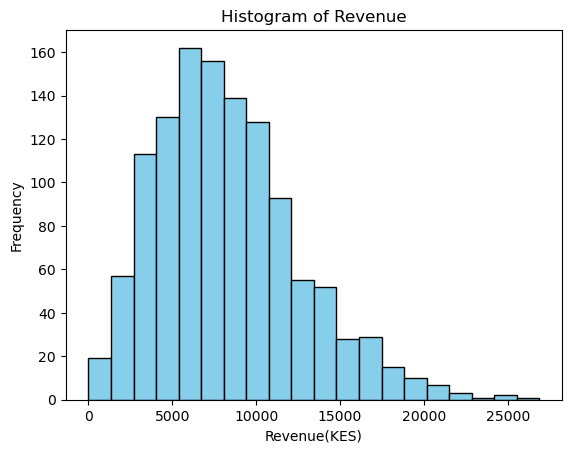

In [29]:
# Histogram of revenue
plt.figure()
plt.hist(df['revenue'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Revenue(KES)')
plt.ylabel('Frequency')
plt.title('Histogram of Revenue')
plt.show()

In [30]:
# skewness and kurtosis
skewness = df['revenue'].skew()
kurtosis = df['revenue'].kurtosis()

skewness, kurtosis

(0.7490242110048875, 0.6137388543678663)